#Student Name: Varun Aggarwal
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [1]:
#Import necessary packages
import keras

import numpy as np

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import pickle as cPickle
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Part 0: Importing and normalizing data

In [2]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

# Part 1: Plotting cross entropy

/apps/spack/gilbreth/apps/anaconda/5.1.0-py27-gcc-4.8.5-4muurok/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


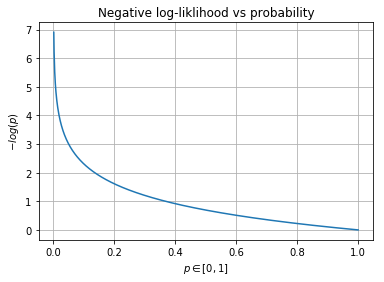

In [43]:
#Show cross-entropy loss function

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
p = np.linspace(0,1,1000)
z = -np.log(p)
plt.plot(p,z)
plt.title("Negative log-liklihood vs probability")
plt.xlabel("$p \in [0,1]$")
plt.ylabel("$-log(p)$")
plt.grid(True)

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: As seen from the graph, negative log-likelihood and p have kind of an inverse relationship. Which means, 
  * smaller p = larger negative log-likelihood
  * larger p = smaller negative log-likelihood
  

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: Essentially, if probability of output class is high, the value of objective funtion would be low. Which can be interepreted as netowrk is close to the solution. Other way round, if probability is low, the final cost will be higher which signifies that netowrk is far away from the solution and need to make an update. 




# Part 2: Overfit CNN

In [44]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    # Layer 1
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))

    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 3
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 5
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))  
    
    return model

#Create instance of CNN model graph
obj = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 67us/step - loss: 1.2217 - acc: 0.5820 - val_loss: 0.7304 - val_acc: 0.7153
Epoch 2/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.5975 - acc: 0.7748 - val_loss: 0.5699 - val_acc: 0.7804
Epoch 3/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4995 - acc: 0.8161 - val_loss: 0.4967 - val_acc: 0.8192
Epoch 4/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4387 - acc: 0.8414 - val_loss: 0.5091 - val_acc: 0.8140
Epoch 5/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4100 - acc: 0.8535 - val_loss: 0.4399 - val_acc: 0.8384
Epoch 6/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.3758 - acc: 0.8677 - val_loss: 0.4088 - val_acc: 0.8523
Epoch 7/200
60000/60000 [==============================] - 3s 56us/step - loss: 0.3525 - acc: 0.8752 - val_loss: 0.3883 - 

Epoch 118/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5615 - val_acc: 0.9195
Epoch 119/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.9093e-04 - acc: 1.0000 - val_loss: 0.5649 - val_acc: 0.9198
Epoch 120/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.4249e-04 - acc: 1.0000 - val_loss: 0.5656 - val_acc: 0.9193
Epoch 121/200
60000/60000 [==============================] - 3s 55us/step - loss: 7.6531e-04 - acc: 1.0000 - val_loss: 0.5688 - val_acc: 0.9192
Epoch 122/200
60000/60000 [==============================] - 3s 55us/step - loss: 7.0844e-04 - acc: 1.0000 - val_loss: 0.5744 - val_acc: 0.9190
Epoch 123/200
60000/60000 [==============================] - 3s 55us/step - loss: 7.2977e-04 - acc: 1.0000 - val_loss: 0.5752 - val_acc: 0.9183
Epoch 124/200
60000/60000 [==============================] - 3s 55us/step - loss: 6.8856e-04 - acc: 1.0000 - val_loss: 0.5789 - val_acc: 0.9

Epoch 175/200
60000/60000 [==============================] - 3s 55us/step - loss: 9.7618e-05 - acc: 1.0000 - val_loss: 0.6720 - val_acc: 0.9184
Epoch 176/200
60000/60000 [==============================] - 3s 55us/step - loss: 9.2166e-05 - acc: 1.0000 - val_loss: 0.6740 - val_acc: 0.9185
Epoch 177/200
60000/60000 [==============================] - 3s 55us/step - loss: 9.1436e-05 - acc: 1.0000 - val_loss: 0.6754 - val_acc: 0.9182
Epoch 178/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.7365e-05 - acc: 1.0000 - val_loss: 0.6761 - val_acc: 0.9189
Epoch 179/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.6962e-05 - acc: 1.0000 - val_loss: 0.6764 - val_acc: 0.9182
Epoch 180/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.4925e-05 - acc: 1.0000 - val_loss: 0.6784 - val_acc: 0.9187
Epoch 181/200
60000/60000 [==============================] - 3s 55us/step - loss: 8.0932e-05 - acc: 1.0000 - val_loss: 0.6798 - val_acc:

In [45]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 24us/step
Test Accuracy: 91.85%


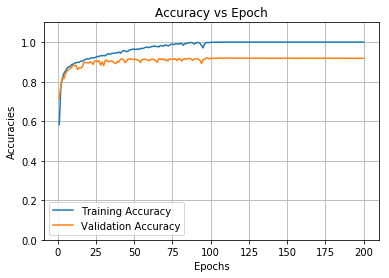

In [46]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1.1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

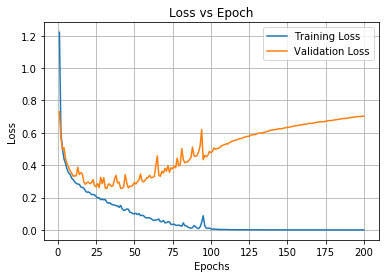

In [47]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Close to 0 around 4.7754e-05

2.   What does the loss of the testing set go to? 

  ANS: This is hgiher, around 0.702
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The model is fitting very well for the training dataset. The big difference between the two losses is attributed to ovefitting. The model doesn' generalize well on the testing set. 

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The big difference between the two losses is attributed to ovefitting. The model doesn' generalize well on the testing set. It can be avoided by use of regularization like dropout. Or by using a smaller network. 

# Part 3: Dropout on input layer

In [48]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1 - dropout
    model.add(Dropout(0.3))
    
    # Layer 2
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))

    # Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 4
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    
    # Layer 5
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 6
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal")) 
    
    return model

#Create instance of CNN model graph
obj = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 68us/step - loss: 1.1937 - acc: 0.5689 - val_loss: 0.7865 - val_acc: 0.7113
Epoch 2/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.6522 - acc: 0.7537 - val_loss: 0.6801 - val_acc: 0.7503
Epoch 3/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.5615 - acc: 0.7868 - val_loss: 0.6010 - val_acc: 0.7839
Epoch 4/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.5056 - acc: 0.8122 - val_loss: 0.5428 - val_acc: 0.8053
Epoch 5/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4736 - acc: 0.8256 - val_loss: 0.5336 - val_acc: 0.8107
Epoch 6/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4408 - acc: 0.8381 - val_loss: 0.5213 - val_acc: 0.8066
Epoch 7/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4299 - acc: 0.8400 - val_loss: 0.4924 - 

Epoch 118/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1330 - acc: 0.9485 - val_loss: 0.3292 - val_acc: 0.8887
Epoch 119/200
60000/60000 [==============================] - 3s 58us/step - loss: 0.1271 - acc: 0.9504 - val_loss: 0.3353 - val_acc: 0.8894
Epoch 120/200
60000/60000 [==============================] - 3s 56us/step - loss: 0.1296 - acc: 0.9499 - val_loss: 0.3059 - val_acc: 0.8981
Epoch 121/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1350 - acc: 0.9484 - val_loss: 0.3422 - val_acc: 0.8900
Epoch 122/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1236 - acc: 0.9524 - val_loss: 0.3059 - val_acc: 0.8979
Epoch 123/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1210 - acc: 0.9542 - val_loss: 0.3198 - val_acc: 0.8945
Epoch 124/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1275 - acc: 0.9513 - val_loss: 0.3187 - val_acc: 0.8963
Epoch 125/200
60000/

In [49]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 24us/step
Test Accuracy: 89.50%


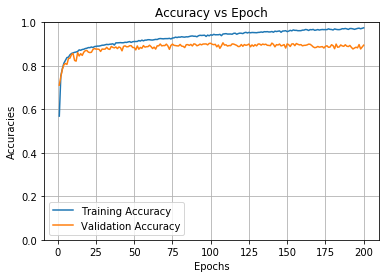

In [50]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

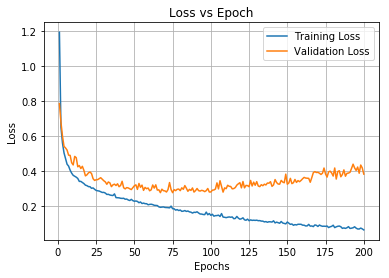

In [51]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 

1. What does the loss of the training set go to?
  + ANS: It goes close to 0.0659   
  
2. What does the loss of the testing set go to? 
  + ANS: It goes close to 0.3843   
  
3. Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 
  + ANS: The model is overfitting even though we are applying dropout. This is because dropout is not applied in the correct location of the network. Applying dropout at input is wasteful because we throwing away input pixels randomly which might contain essential information. 

# Part 4-I: Dropout on Hidden Layers

In [19]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
       
    # Layer 1
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
              
    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 3
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    model.add(Dropout(0.3))
              
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 5
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))     
    return model

#Create instance of CNN model graph
obj = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 106us/step - loss: 1.1524 - acc: 0.5742 - val_loss: 0.8524 - val_acc: 0.7080
Epoch 2/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.6077 - acc: 0.7704 - val_loss: 0.6774 - val_acc: 0.7848
Epoch 3/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.4988 - acc: 0.8145 - val_loss: 0.5944 - val_acc: 0.8080
Epoch 4/200
60000/60000 [==============================] - 6s 97us/step - loss: 0.4461 - acc: 0.8372 - val_loss: 0.5585 - val_acc: 0.8136
Epoch 5/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.4039 - acc: 0.8545 - val_loss: 0.5078 - val_acc: 0.8312
Epoch 6/200
60000/60000 [==============================] - 6s 97us/step - loss: 0.3826 - acc: 0.8606 - val_loss: 0.4692 - val_acc: 0.8564
Epoch 7/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.3594 - acc: 0.8700 - val_loss: 0.4707 -

Epoch 118/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0401 - acc: 0.9854 - val_loss: 0.2535 - val_acc: 0.9202
Epoch 119/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.0402 - acc: 0.9852 - val_loss: 0.2522 - val_acc: 0.9218
Epoch 120/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0474 - acc: 0.9821 - val_loss: 0.2534 - val_acc: 0.9277
Epoch 121/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0420 - acc: 0.9843 - val_loss: 0.2489 - val_acc: 0.9241
Epoch 122/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0454 - acc: 0.9834 - val_loss: 0.2620 - val_acc: 0.9199
Epoch 123/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0397 - acc: 0.9854 - val_loss: 0.2661 - val_acc: 0.9192
Epoch 124/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0416 - acc: 0.9847 - val_loss: 0.2736 - val_acc: 0.9181
Epoch 125/200
60000/

In [20]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 25us/step
Test Accuracy: 92.30%


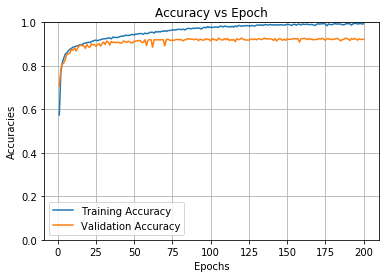

In [21]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

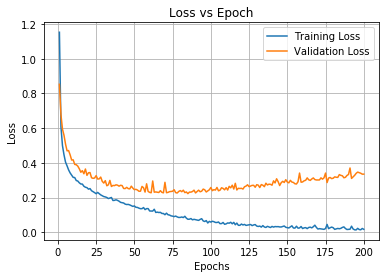

In [22]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: Goes to close to 0.0170
  
2.   What does the loss of the testing set go to? 

  ANS: Close to 0.3350 

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Applying dropout in hidden layer is better. Because this way, network can regularize appropriately therefore not overfit as much.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The difference in accuracy is 99.39 - 92.30 = 7.09%. This is not the best but compared to previous networks, it is an improvement. 

# Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [31]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1 - dropout
    model.add(Dropout(0.3))
    
    # Layer 2
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
              
    # Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 4
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    model.add(Dropout(0.3))
              
    # Layer 5
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 6
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))         
    return model


#Create instance of CNN model graph
obj = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 107us/step - loss: 1.1100 - acc: 0.5982 - val_loss: 0.9486 - val_acc: 0.6939
Epoch 2/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.6438 - acc: 0.7565 - val_loss: 0.7944 - val_acc: 0.7667
Epoch 3/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.5573 - acc: 0.7919 - val_loss: 0.7088 - val_acc: 0.7964
Epoch 4/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.5118 - acc: 0.8088 - val_loss: 0.7062 - val_acc: 0.8013
Epoch 5/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4902 - acc: 0.8179 - val_loss: 0.6610 - val_acc: 0.8227
Epoch 6/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4633 - acc: 0.8254 - val_loss: 0.6752 - val_acc: 0.8279
Epoch 7/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4417 - acc: 0.8352 - val_loss: 0.6440 -

Epoch 118/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1682 - acc: 0.9346 - val_loss: 0.3235 - val_acc: 0.8768
Epoch 119/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1693 - acc: 0.9351 - val_loss: 0.3318 - val_acc: 0.8754
Epoch 120/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1651 - acc: 0.9352 - val_loss: 0.3212 - val_acc: 0.8777
Epoch 121/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1643 - acc: 0.9362 - val_loss: 0.3339 - val_acc: 0.8750
Epoch 122/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1680 - acc: 0.9349 - val_loss: 0.3065 - val_acc: 0.8840
Epoch 123/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1591 - acc: 0.9386 - val_loss: 0.3388 - val_acc: 0.8663
Epoch 124/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1604 - acc: 0.9377 - val_loss: 0.3222 - val_acc: 0.8767
Epoch 125/200
60000/

In [32]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 24us/step
Test Accuracy: 87.53%


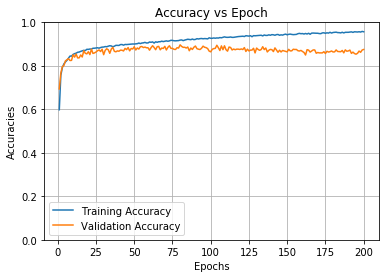

In [34]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

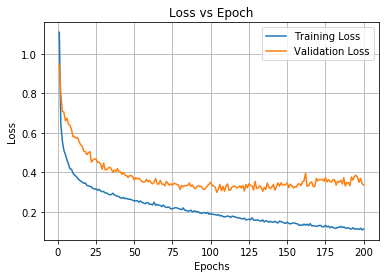

In [35]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: Goes to 0.1125
  
2.   What does the loss of the testing set go to? 

  ANS: Goes to 0.3363
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: Difference is 95.68 - 87.53 = 8.15 %

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: The testig accuracy decreases when dropout is applied to input as well.  Which also means that the robustness decreases as for unseen data (i.e. test data) model doesn't perform as well.

# Part 5 : Activation Functions

In [4]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    
    # Layer 1
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
              
    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 3
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    model.add(Dropout(0.3))
              
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 5
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))

    return model

In [8]:
########## Fun with Sigmoid ##########

#Create instance of CNN model graph
obj_sigmoid = CNN_dropout_both_act()
obj_sigmoid.add(Dense(10, activation="sigmoid", kernel_initializer="normal"))  

#Compile model using an appropriate loss and optimizer algorithm
obj_sigmoid.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
hist = obj_sigmoid.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536,
                        verbose=0) 

#Print accuracy of model on testing set after training 
[test_loss,test_acc] = obj_sigmoid.evaluate(data_test, labels_test, batch_size = 512, verbose=0)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

Test Accuracy: 91.97%


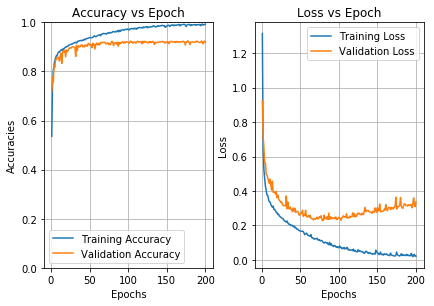

In [27]:
# plots for sigmoid
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()

# accuracy
ax1.plot(range(1,201),hist.history['acc'])
ax1.plot(range(1,201),hist.history['val_acc'])
ax1.set_title("Accuracy vs Epoch")
ax1.set_xlabel("Epochs")
ax1.set_ylim(0,1)
ax1.set_ylabel("Accuracies")
ax1.legend(['Training Accuracy','Validation Accuracy'])
ax1.grid(True)

# loss
ax2.plot(range(1,201),hist.history['loss'])
ax2.plot(range(1,201),hist.history['val_loss'])
ax2.set_title("Loss vs Epoch")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Training Loss','Validation Loss'])
ax2.grid(True)

In [34]:
########## Fun with Tanh ##########

#Create instance of CNN model graph
obj_tanh = CNN_dropout_both_act()
obj_tanh.add(Dense(10, activation="tanh", kernel_initializer="normal"))  

#Compile model using an appropriate loss and optimizer algorithm
obj_tanh.compile(loss="mean_squared_error",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
hist = obj_tanh.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536,
                        verbose=0) 

#Print accuracy of model on testing set after training 
[test_loss,test_acc] = obj_tanh.evaluate(data_test, labels_test, batch_size = 512, verbose=0)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

Test Accuracy: 92.16%


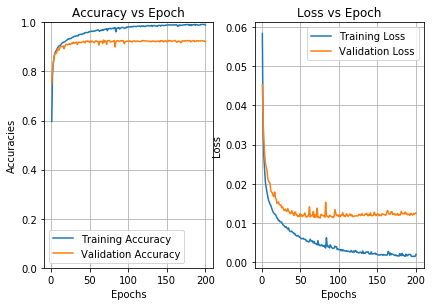

In [35]:
# plots for tanh
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()

# accuracy
ax1.plot(range(1,201),hist.history['acc'])
ax1.plot(range(1,201),hist.history['val_acc'])
ax1.set_title("Accuracy vs Epoch")
ax1.set_xlabel("Epochs")
ax1.set_ylim(0,1)
ax1.set_ylabel("Accuracies")
ax1.legend(['Training Accuracy','Validation Accuracy'])
ax1.grid(True)

# loss
ax2.plot(range(1,201),hist.history['loss'])
ax2.plot(range(1,201),hist.history['val_loss'])
ax2.set_title("Loss vs Epoch")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Training Loss','Validation Loss'])
ax2.grid(True)

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS:
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: It doesn't work as the loss doesn't minimize.

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: Because its value ranges from -1 to +1 instead of 0 to 1. For cross entropy loss, $ln(x) + ln(1-x)$ value of x has to be between 0 and 1, anything beyond it would be log of negative value which is undefined. 

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: Because range of sigmoid is [0,1]


#Part 6: Creating a CLDNN

In [ ]:
Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [4]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

--2020-09-21 12:40:19--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

100%[====================================>] 1,245,608,913 1.11MB/s   in 18m 36s

2020-09-21 12:58:55 (1.06 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [2]:
#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))

In [3]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

In [5]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1
    model.add(Conv2D(256, (1, 3), 
              activation="relu", 
              input_shape=(2, 128,1)))
    model.add(Dropout(0.20))
    
    # Layer 2
    model.add(Conv2D(256, (2, 3), 
              activation="relu"))
    
    # Layer 3
    model.add(Conv2D(80, (1, 3),
              activation="relu"))
    model.add(Dropout(.20))
    
    # Layer 4
    model.add(Conv2D(80, (1, 3), 
              activation="relu"))
    
    # Reshape
    model.add(Reshape((16, 600)))
    
    # LSTM
    model.add(LSTM(50))
    
    # FC Layer 1
    model.add(Dense(128, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))
    
    return model

#Create instance of CNN model graph
obj = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(X_train, Y_train, 
                        validation_data=(X_test, Y_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 432000 samples, validate on 108000 samples
Epoch 1/200
432000/432000 [==============================] - 44s 102us/step - loss: 1.6680 - acc: 0.3069 - val_loss: 1.0607 - val_acc: 0.4935
Epoch 2/200
432000/432000 [==============================] - 43s 100us/step - loss: 0.7233 - acc: 0.6560 - val_loss: 0.5174 - val_acc: 0.7334
Epoch 3/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.4879 - acc: 0.7468 - val_loss: 0.4574 - val_acc: 0.7625
Epoch 4/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.4265 - acc: 0.7769 - val_loss: 0.4321 - val_acc: 0.7717
Epoch 5/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3872 - acc: 0.7915 - val_loss: 0.3667 - val_acc: 0.7996
Epoch 6/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3604 - acc: 0.8030 - val_loss: 0.3431 - val_acc: 0.8009
Epoch 7/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3435 - acc: 0.8

432000/432000 [==============================] - 43s 99us/step - loss: 0.1175 - acc: 0.9343 - val_loss: 0.1657 - val_acc: 0.9214
Epoch 116/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1174 - acc: 0.9344 - val_loss: 0.1647 - val_acc: 0.9220
Epoch 117/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1174 - acc: 0.9341 - val_loss: 0.1654 - val_acc: 0.9209
Epoch 118/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1184 - acc: 0.9340 - val_loss: 0.1653 - val_acc: 0.9211
Epoch 119/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1163 - acc: 0.9344 - val_loss: 0.1712 - val_acc: 0.9205
Epoch 120/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1159 - acc: 0.9352 - val_loss: 0.1702 - val_acc: 0.9211
Epoch 121/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1163 - acc: 0.9346 - val_loss: 0.1903 - val_acc: 0.9150
Epoch 122/200

In [31]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(X_test, Y_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

108000/108000 [==============================] - 5s 47us/step
Test Accuracy: 92.32%


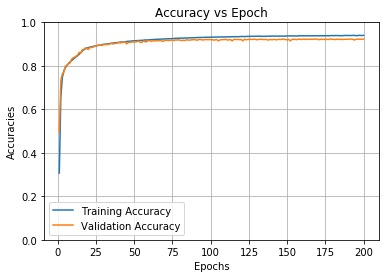

In [49]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

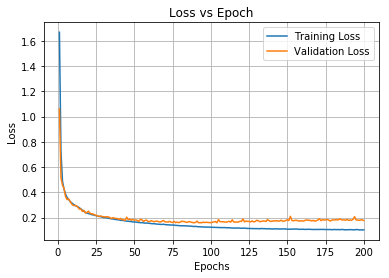

In [40]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: 

2.   Give two ways to improve the robustness of the model.

  ANS: 